In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import functools as ft
from scipy import interpolate

# Set some formatting parameters for matplotlib parameters
matplotlib.rcParams.update({'font.size': 16})  # Font size
matplotlib.rc('text', usetex=True)             # Use Latex formatting for text
matplotlib.rc('font',family='Times New Roman') # Use Times New Roman font

In [2]:
# Create a list of years for which I have data
# Have data from 1990 until 2024
years_of_data = np.arange(1990,2025,1)

print(years_of_data)
n_years = len(years_of_data)

[1990 1991 1992 1993 1994 1995 1996 1997 1998 1999 2000 2001 2002 2003
 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014 2015 2016 2017
 2018 2019 2020 2021 2022 2023 2024]


**Read in the available data**

In [3]:
# Read in LEGO set data
lego_df = pd.read_pickle('data/Lego_data.pkl')

**Add columns of data for the price per piece and price per weight**

In [4]:
# Add in columns of data for the price per piece for AU, US, UK and Germany (Euro)
lego_df['AU_PPP'] = lego_df['AURetailPrice']/lego_df['Pieces']
lego_df['US_PPP'] = lego_df['USRetailPrice']/lego_df['Pieces']
lego_df['UK_PPP'] = lego_df['UKRetailPrice']/lego_df['Pieces']
lego_df['DE_PPP'] = lego_df['DERetailPrice']/lego_df['Pieces']

# Add in columns of data for the price per weight for AU, US, UK and Germany (Euro)
lego_df['AU_PPW'] = lego_df['AURetailPrice']/lego_df['Weight (in Grams)']
lego_df['US_PPW'] = lego_df['USRetailPrice']/lego_df['Weight (in Grams)']
lego_df['UK_PPW'] = lego_df['UKRetailPrice']/lego_df['Weight (in Grams)']
lego_df['DE_PPW'] = lego_df['DERetailPrice']/lego_df['Weight (in Grams)']

**Calculate relevant information when splitting the available data by LEGO theme**

Essentially go through and calculate the mean PPP and mean PPW for each individual LEGO theme and compare to the global mean (all LEGO sets). Additionally, determine percentile information (10th, 25th, 50th, 75th and 90th) for creating box and whisker plots which help visualise the distribution of LEGO sets within the given theme.

In [5]:
# List containing a variety of LEGO themes (those with sufficient numbers of sets)
set_theme_names = ['Star Wars', 'Technic', 'City','Creator','Icons','Ideas','Friends','Disney',
                   'Marvel Super Heroes','Classic','Minecraft','Dreamzzz','Ninjago','Harry Potter',
                    'BrickHeadz','Seasonal','DC Comics Super Heroes','Super Mario','Jurassic World',
                   'Monkie Kid','Miscellaneous','Sonic the Hedgehog','Speed Champions','Art',
                   'Promotional','Dots','Avatar']

# Determine the number of themes we are going to investigate (the number of themes listed above)
n_theme_names = len(set_theme_names)

# Obtain the relevant LEGO data for the past three years (2022 - 2024)
selected_data_3yr = lego_df[(lego_df['YearFrom'] >= 2022) & (lego_df['YearFrom'] <= 2024)].copy()

# Calculate the mean PPP and PPW for comparing themes to the global mean
mean_PPP = np.mean(selected_data_3yr['AU_PPP'].values.tolist())
mean_PPW = np.mean(selected_data_3yr['AU_PPW'].values.tolist())

# Total number of LEGO sets selected within this 3 year window
total_within_3yr = len(selected_data_3yr)

# Create a numpy array to store relevant percentile information (for creating the box and whisker plot)
percentile_information_theme_3yr = np.zeros((2,n_theme_names,5))
percentile_values = [10.,25.,50.,75.,90.]

# Lists to hold all the individual PPP and PPW values for the given LEGO theme
theme_data_piece_3yr = []
theme_data_weight_3yr = []

# Calculate the total number of LEGO sets that are included by our list of themes above (helpful to know if its worth adding more themes)
cumulative_sum_3yr = 0

# Loop over all possible LEGO themes we are considering
for i_theme in range(len(set_theme_names)):
    # Filter the dataframe on the current LEGO theme
    filter_3yr = selected_data_3yr['Theme'].str.contains('%s'%(set_theme_names[i_theme]))

    # Loop over our different percentile thresholds to determine their values for the current LEGO theme
    for i_perc in range(len(percentile_values)):
        # Find the percentile information for the PPP
        if len(selected_data_3yr[filter_3yr]) > 0:
            percentile_information_theme_3yr[0][i_theme][i_perc] = np.percentile(selected_data_3yr[filter_3yr]['AU_PPP'],
                                                                                 percentile_values[i_perc])
        # Find the percentile information for the PPP
        if len(selected_data_3yr[filter_3yr]) > 0:    
            percentile_information_theme_3yr[1][i_theme][i_perc] = np.percentile(selected_data_3yr[filter_3yr]['AU_PPW'],
                                                                                 percentile_values[i_perc])            
    # Add to the cumulative sum of the number of sets with themes included in our list
    cumulative_sum_3yr += len(selected_data_3yr[filter_3yr])

    # Output a summary of the number of LEGO sets within a theme
    print('Theme name: %s, Number of sets available: %s'%(set_theme_names[i_theme],len(selected_data_3yr[filter_3yr])))

    # Add the individual PPP and PPW values for the current theme to the existing list for usage later
    theme_data_piece_3yr.append(selected_data_3yr[filter_3yr]['AU_PPP'].values.tolist())
    theme_data_weight_3yr.append(selected_data_3yr[filter_3yr]['AU_PPW'].values.tolist())

print('Total number of possible sets within our subset of data: %d, Total number of sets with available themes: %d'%(total_within_3yr,
                                                                                                                      cumulative_sum_3yr))

Theme name: Star Wars, Number of sets available: 76
Theme name: Technic, Number of sets available: 55
Theme name: City, Number of sets available: 100
Theme name: Creator, Number of sets available: 50
Theme name: Icons, Number of sets available: 46
Theme name: Ideas, Number of sets available: 23
Theme name: Friends, Number of sets available: 80
Theme name: Disney, Number of sets available: 50
Theme name: Marvel Super Heroes, Number of sets available: 67
Theme name: Classic, Number of sets available: 19
Theme name: Minecraft, Number of sets available: 36
Theme name: Dreamzzz, Number of sets available: 23
Theme name: Ninjago, Number of sets available: 53
Theme name: Harry Potter, Number of sets available: 41
Theme name: BrickHeadz, Number of sets available: 46
Theme name: Seasonal, Number of sets available: 27
Theme name: DC Comics Super Heroes, Number of sets available: 13
Theme name: Super Mario, Number of sets available: 6
Theme name: Jurassic World, Number of sets available: 20
Theme 

**Determine the relevant PPP and PPW data when splitting by licensed and unlicensed sets**

Lets now split our data by licensed and unlicensed LEGO themes. Note, some themes (e.g. Ideas) can include both licensed and unlicensed sets. Therefore, they are excluded from this part of the analysis.

In [6]:
# Lists of LEGO themes that correspond to licensed sets
sets_licensed = ['Star Wars','Disney','Marvel Super Heroes','Minecraft','Harry Potter','DC Comics Super Heroes',
                 'Super Mario','Jurassic World','Sonic the Hedgehog','Avatar']

# List of LEGO themes that correspond to unlicensed sets
sets_unlicensed = ['City','Creator','Friends','Classic','Dreamzzz','Ninjago','Seasonal',
                  'Monkie Kid','Dots','Hidden Side']

# Number of licensed and unlicensed set themes we are considering
n_theme_names_licensed = len(sets_licensed)
n_theme_names_unlicensed = len(sets_unlicensed)

# Create a subset of our 3yr data that corresponds to our licensed LEGO sets
selected_data_licensed_3yr = selected_data_3yr['Theme'].str.contains('%s'%(sets_licensed[0]))
df_licensed_3yr = selected_data_3yr[selected_data_licensed_3yr]

# Create a subset of our 3yr data that corresponds to our unlicensed LEGO sets
selected_data_unlicensed_3yr = selected_data_3yr['Theme'].str.contains('%s'%(sets_licensed[0]))
df_unlicensed_3yr = selected_data_3yr[selected_data_unlicensed_3yr]

# Loop over the remaining themes within our licensed set list above and append them to the pandas dataframe
for i_theme in range(n_theme_names_licensed-1):
    selected_data_licensed_3yr = selected_data_3yr['Theme'].str.contains('%s'%(sets_licensed[i_theme+1]))
    df_licensed_3yr = pd.concat([df_licensed_3yr, selected_data_3yr[selected_data_licensed_3yr]], axis=0)

# Loop over the remaining themes within our unlicensed set list above and append them to the pandas dataframe
for i_theme in range(n_theme_names_unlicensed-1):    
    selected_data_unlicensed_3yr = selected_data_3yr['Theme'].str.contains('%s'%(sets_unlicensed[i_theme+1]))
    df_unlicensed_3yr = pd.concat([df_unlicensed_3yr, selected_data_3yr[selected_data_unlicensed_3yr]], axis=0)

print('Total licensed sets: %d, Total unlicensed sets: %d'%(len(df_licensed_3yr),len(df_unlicensed_3yr)))

Total licensed sets: 327, Total unlicensed sets: 380


**Plot a histogram comparing the licensed/unlicensed sets when considering price per piece (PPP)**

Overlay the two histograms of licensed (red) and unlicensed (blue) PPP information. Additionally show the mean PPP for the licensed and unlicensed sets.

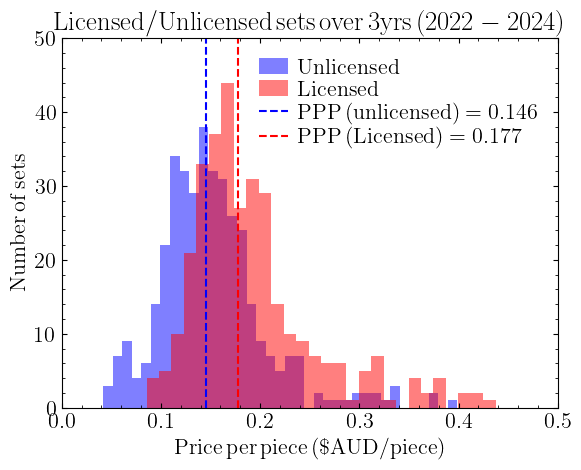

In [7]:
# Draw the histogram of all individual PPP values for the unlicensed sets
plt.hist(df_unlicensed_3yr['AU_PPP'], bins = 50,alpha=0.5,color='blue',label=r"${\rm Unlicensed}$")
# Draw the histogram of all individual PPP values for the licensed sets
plt.hist(df_licensed_3yr['AU_PPP'], bins = 50,alpha=0.5,color='red',label=r"${\rm Licensed}$")

# Draw a verticle blue dashed line denoting the median PPP of all unlicensed sets)
plt.axvline(np.median(df_unlicensed_3yr['AU_PPP'].values.tolist()),color='blue',linestyle='dashed',
            label=r"${\rm PPP\,(unlicensed) = %.3g}$"%(np.median(df_unlicensed_3yr['AU_PPP'].values.tolist())))

# Draw a verticle red dashed line denoting the median PPP of all licensed sets)
plt.axvline(np.median(df_licensed_3yr['AU_PPP'].values.tolist()),color='red',linestyle='dashed',
           label=r"${\rm PPP\,(Licensed) = %.3g}$"%(np.median(df_licensed_3yr['AU_PPP'].values.tolist())))

# Plot the legend
plt.legend(loc=1, frameon=False, handlelength = 1.3, handletextpad=0.4, labelspacing=0.1)

# Define the x and y axis bounds
plt.xlim(0.0,0.5)
plt.ylim(0,50)

# Add all tick values to the plot
plt.tick_params(which='both', left=True, right=True, top=True, bottom=True, direction='in')
plt.minorticks_on()

# Define the x, y and title labels for the figure
plt.xlabel(r"${\rm Price\,per\,piece\,(\$AUD/piece)}$")
plt.ylabel(r"${\rm Number\,of\,sets}$")
plt.title(r"${\rm Licensed/Unlicensed\,sets\,over\,3yrs\,(2022-2024)}$")
plt.savefig("piece_licensed.png",dpi=300)

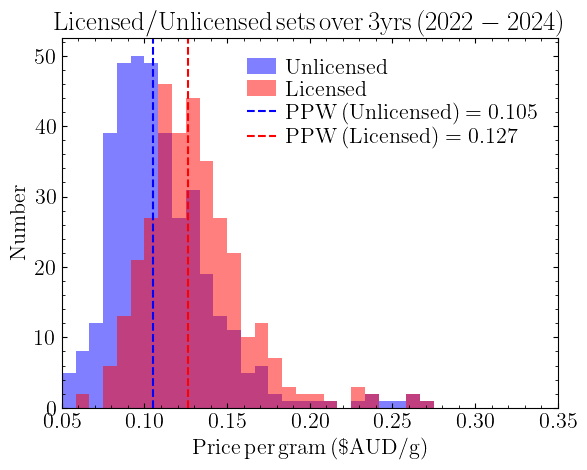

In [8]:
# Draw the histogram of all individual PPW values for the unlicensed sets
plt.hist(df_unlicensed_3yr['AU_PPW'], bins = 60,alpha=0.5, range=[0.,0.5],color='blue',label=r"${\rm Unlicensed}$")
# Draw the histogram of all individual PPW values for the licensed sets
plt.hist(df_licensed_3yr['AU_PPW'], bins = 60,range=[0.,0.5],alpha=0.5,color='red',label=r"${\rm Licensed}$")

# Draw a verticle blue dashed line denoting the median PPW of all unlicensed sets)
plt.axvline(np.median(df_unlicensed_3yr['AU_PPW'].values.tolist()),color='blue',linestyle='dashed',
           label=r"${\rm PPW\,(Unlicensed) = %.3g}$"%(np.median(df_unlicensed_3yr['AU_PPW'].values.tolist())))

# Draw a verticle blue dashed line denoting the median PPW of all licensed sets)
plt.axvline(np.median(df_licensed_3yr['AU_PPW'].values.tolist()),color='red',linestyle='dashed',
           label=r"${\rm PPW\,(Licensed) = %.3g}$"%(np.median(df_licensed_3yr['AU_PPW'].values.tolist())))

# Plot the legend
plt.legend(loc=1, frameon=False, handlelength = 1.3, handletextpad=0.4, labelspacing=0.1)

# Define the x and y axis bounds
plt.xlim(0.05,0.35)

# Add all tick values to the plot
plt.tick_params(which='both', left=True, right=True, top=True, bottom=True, direction='in')
plt.minorticks_on()

# Define the x, y and title labels for the figure
plt.xlabel(r"${\rm Price\,per\,gram\,(\$AUD/g)}$")
plt.ylabel(r"${\rm Number}$")
plt.title(r"${\rm Licensed/Unlicensed\,sets\,over\,3yrs\,(2022-2024)}$")
plt.savefig("weight_licensed.png",dpi=300)

**Create a box and whisker plot for the PPP for all considered LEGO themes**

Draw the box and whisker plot for each individual LEGO theme and colour each according to whether they are a licensed (red) or unlicensed (blue) theme. Themes not denoted licensed/unlicensed are coloured black. Overlay the mean PPP for all sets to demonstrate which individual themes have the highest/lowest PPP values.

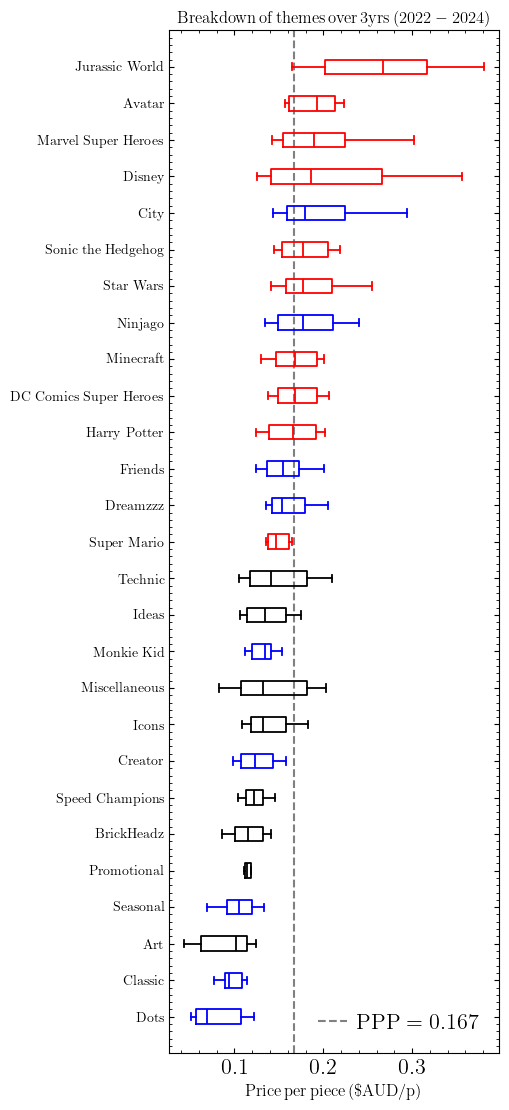

In [9]:
# Sort all themes by their median values in order to be able to plot themes in descending order in terms of PPP
sorted_indices = [val for _, val in sorted(zip(percentile_information_theme_3yr[0,:,2], [i for i in range(n_theme_names)]))]

# Create figure
plt.figure(figsize=(5,11))
ax = plt.subplot(1,1,1)

# Adjust the figure size
plt.subplots_adjust(0.32,0.05,0.98,0.98,0.02,0.02)

# Blank y-label to be able to add the sorted theme names
tick_labels_y = []

# Draw the vertical dashed line of the mean PPP obtained from all the LEGO sets within the 3 year window (2022 - 2024).
plt.axvline(mean_PPP,color='gray',linestyle='dashed',label=r"${\rm PPP = %.3g}$"%(mean_PPP))

# Loop over all available LEGO themes
for i_theme in range(n_theme_names):

    # Create a dictionary for drawing a coloured box and whisker plot according to whether it is licensed or not
    if set_theme_names[sorted_indices[i_theme]] in sets_licensed:    
        boxprops_alt = (dict(linestyle='solid', linewidth=1.3, color='red'))    
    elif set_theme_names[sorted_indices[i_theme]] in sets_unlicensed:
        boxprops_alt = (dict(linestyle='solid', linewidth=1.3, color='blue'))
    else:
        boxprops_alt = (dict(linestyle='solid', linewidth=1.3, color='black'))

    # Append the name of the current LEGO theme (sorted in descending order of PPP)
    tick_labels_y.append('%s'%(set_theme_names[sorted_indices[i_theme]]))
    # Draw the box and whisker plot for the current LEGO theme
    plt.boxplot(theme_data_piece_3yr[sorted_indices[i_theme]], whis=[10, 90], showfliers=False,vert=False,
                positions=[0.35+0.5*float(i_theme)],
                boxprops=boxprops_alt,medianprops=boxprops_alt,whiskerprops=boxprops_alt,
                capprops=boxprops_alt,widths=0.2)

# Draw the legend for the figure
plt.legend(loc=4, frameon=False, handlelength = 1.3, handletextpad=0.4, labelspacing=0.1)

# Set the y-labels (theme names)
ax.set_yticklabels(tick_labels_y, fontsize=10)

# Define the x and title labels for the figure
plt.xlabel(r"${\rm Price\,per\,piece\,(\$AUD/p)}$",fontsize=12)
plt.title(r"${\rm Breakdown\,of\,themes\,over\,3yrs\,(2022-2024)}$",fontsize=12)

# Add all tick values to the plot
plt.tick_params(which='both', left=True, right=True, top=True, bottom=True, direction='in')
plt.minorticks_on()
plt.savefig("theme_pieces.png",dpi=300)

**Create a box and whisker plot for the PPW for all considered LEGO themes**

Draw the box and whisker plot for each individual LEGO theme and colour each according to whether they are a licensed (red) or unlicensed (blue) theme. Themes not denoted licensed/unlicensed are coloured black. Overlay the mean PPW for all sets to demonstrate which individual themes have the highest/lowest PPW values.

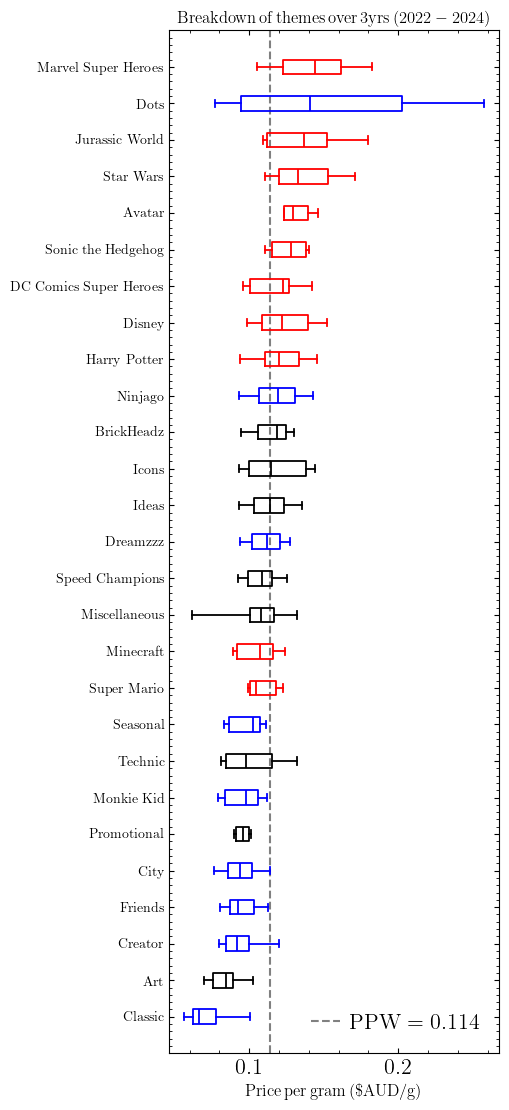

In [10]:
# Sort all themes by their median values in order to be able to plot themes in descending order in terms of PPW
sorted_indices = [val for _, val in sorted(zip(percentile_information_theme_3yr[1,:,2], [i for i in range(n_theme_names)]))]

# Create figure
plt.figure(figsize=(5,11))
ax = plt.subplot(1,1,1)

# Adjust the figure size
plt.subplots_adjust(0.32,0.05,0.98,0.98,0.02,0.02)

# Blank y-label to be able to add the sorted theme names
tick_labels_y = []

# Draw the vertical dashed line of the mean PPW obtained from all the LEGO sets within the 3 year window (2022 - 2024).
plt.axvline(mean_PPW,color='gray',linestyle='dashed',label=r"${\rm PPW = %.3g}$"%(mean_PPW))

# Loop over all available LEGO themes
for i_theme in range(n_theme_names):

    # Create a dictionary for drawing a coloured box and whisker plot according to whether it is licensed or not
    if set_theme_names[sorted_indices[i_theme]] in sets_licensed:    
        boxprops_alt = (dict(linestyle='solid', linewidth=1.3, color='red'))    
    elif set_theme_names[sorted_indices[i_theme]] in sets_unlicensed:
        boxprops_alt = (dict(linestyle='solid', linewidth=1.3, color='blue'))
    else:
        boxprops_alt = (dict(linestyle='solid', linewidth=1.3, color='black'))

    # Append the name of the current LEGO theme (sorted in descending order of PPW)
    tick_labels_y.append('%s'%(set_theme_names[sorted_indices[i_theme]]))
    # Draw the box and whisker plot for the current LEGO theme
    plt.boxplot(theme_data_weight_3yr[sorted_indices[i_theme]], whis=[10, 90], showfliers=False,vert=False,
                positions=[0.35+0.5*float(i_theme)],
                boxprops=boxprops_alt,medianprops=boxprops_alt,whiskerprops=boxprops_alt,
                capprops=boxprops_alt,widths=0.2)

# Draw the legend for the figure
plt.legend(loc=4, frameon=False, handlelength = 1.3, handletextpad=0.4, labelspacing=0.1)

# Set the y-labels (theme names)
ax.set_yticklabels(tick_labels_y,fontsize=10)

# Define the x and title labels for the figure
plt.xlabel(r"${\rm Price\,per\,gram\,(\$AUD/g)}$",fontsize=12)
plt.title(r"${\rm Breakdown\,of\,themes\,over\,3yrs\,(2022-2024)}$",fontsize=12)

# Add all tick values to the plot
plt.tick_params(which='both', left=True, right=True, top=True, bottom=True, direction='in')
plt.minorticks_on()
plt.savefig("theme_weight.png",dpi=300)